In [8]:
# /// Basic libraries
import numpy as np
import pandas as pd
import random

# /// Path files and xml manipulation
from os.path import isfile, join
import xmltodict #library that treats xmls as json files
import os

from os import listdir #os library that lists all the directories

# /// Image processing
import cv2 #opencv

# /// Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def ImageNamesExtraction():
    
    """
    This function give us all the image names of our dataset
    """
    
    image_names = []
    for dirname, _, filenames in os.walk('../ih-final-project/data/medical-masks-dataset/images'):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            extension = fullpath[len(fullpath) - 4:]
            if extension != '.xml':
                image_names.append(filename)
    return image_names

In [10]:
def path_separation(image_name):
    
    """
    This function extract the image and label path to reassign the same name to both files.
    And return the new image and label path of the images.
    
    """
    
    path_master = '../ih-final-project/data/medical-masks-dataset/'
    image_path = path_master + 'images/' + image_name
    
    if image_name[-4:] == 'jpeg':
        label_name = image_name[:-5] + '.xml'
    else:
        label_name = image_name[:-4] + '.xml'
    
    label_path = path_master + 'labels/' + label_name
        
    return  image_path, label_path

In [25]:
def parse_xml(label_path):

    """
    With this function we can obtain the necessary information of each image.
    XML files contain their descriptions like their locations, bounding box and labels good, none or bad.
    
    """
    
    x = xmltodict.parse(open(label_path , 'rb'))
    item_list = x['annotation']['object']
    
    # when image has only one bounding box
    if not isinstance(item_list, list):
        item_list = [item_list]
        
    result = []
    
    for item in item_list:
        name = item['name']
        bndbox = [(int(item['bndbox']['xmin']), int(item['bndbox']['ymin'])),
                  (int(item['bndbox']['xmax']), int(item['bndbox']['ymax']))]       
        result.append((name, bndbox))
    
    size = [int(x['annotation']['size']['width']), 
            int(x['annotation']['size']['height'])]
    
    # result contains name(good, bad, none) and its box's coords
    # size contains width and height of bounding box
    return result, size  

In [38]:
def visualize_image(image_name, bndbox=True):

    """
    This function help us to visualize the images that we want with a common size.
    """
    
    image_path, label_path = path_separation(image_name)
    
    image = cv2.imread(image_path)  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    
    if bndbox:  
        labels, size = parse_xml(label_path)
        thickness = int(sum(size)/400.)
        
        for label in labels:
            name, bndbox = label 
            
            if name == 'good':  
                
                cv2.rectangle(image, bndbox[0], bndbox[1], (0, 255, 0), thickness)
                
            elif name == 'bad': 
                
                cv2.rectangle(image, bndbox[0], bndbox[1], (255, 0, 0), thickness)
                
            else: 
                
                cv2.rectangle(image, bndbox[0], bndbox[1], (0, 0, 255), thickness)
    
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title(image_name)
    plt.imshow(image)
    plt.show()

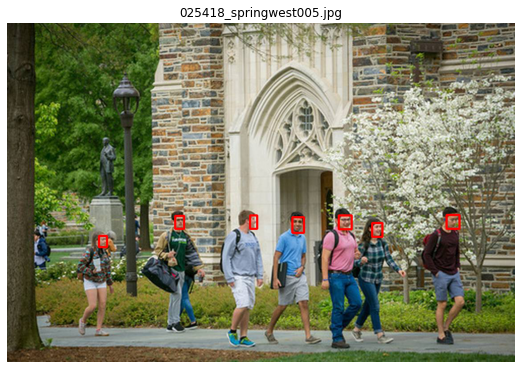

In [39]:
visualize_image('025418_springwest005.jpg')